# Exploratory Data Analysis (EDA) Student Performance

En este notebook realizamos un análisis exploratorio completo usando herramientas automáticas y gráficas personalizadas.

In this notebook, we conduct a full exploratory analysis using automated tools and custom visualizations.

## Instalación de librerías / Library installation

Instalamos ydata_profiling, sweetviz y ajustamos numpy. <br>
We install ydata_profiling, sweetviz, and adjust numpy.


In [ ]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a96653ac38a5efdd86921ff8a782947ef0bef13c23de067cd5116ae8b0ec7003
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
!pip install numpy==1.23.5


In [ ]:
!pip install sweetviz

In [ ]:
#Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import sweetviz as sv


## Carga del dataset / Loading the dataset

Cargamos el archivo StudentsPerformance.csv desde local o Colab. <br>
We load the StudentsPerformance.csv file from local or Colab.

In [ ]:
# Cargando el dataset, debe estar en la misma carpeta si se usa Jupyter Notebook, o se debe subir a la carpeta temporal de Google COlab si se lo trabaj en ese entorno
df = pd.read_csv('StudentsPerformance.csv')

In [ ]:
# Vista general
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Generación de informes automáticos / Automatic report generation

Usamos Sweetviz y Pandas Profiling para obtener reportes rápidos de los datos.<br>
We use Sweetviz and Pandas Profiling to quickly generate data reports.


In [ ]:
import sweetviz as sv

# Generar el informe
report = sv.analyze(df)

# Visualizar en notebook o exportar
report.show_html('sweetviz_report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
from ydata_profiling import ProfileReport

# Generar el informe
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# Mostrar o exportar
profile.to_file("profiling_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 31.27it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Inspección manual del dataframe / Manual dataframe inspection

Revisamos estructura, estadísticas descriptivas y valores nulos.<br>
We check structure, descriptive statistics, and missing values.


In [ ]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Estadísticas descriptivas
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# Comprobar valores nulos
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
print(df.columns)


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


## Detección de outliers con boxplots / Outlier detection with boxplots

Visualizamos posibles valores atípicos en las variables numéricas.<br>
We visualize potential outliers in numerical variables.


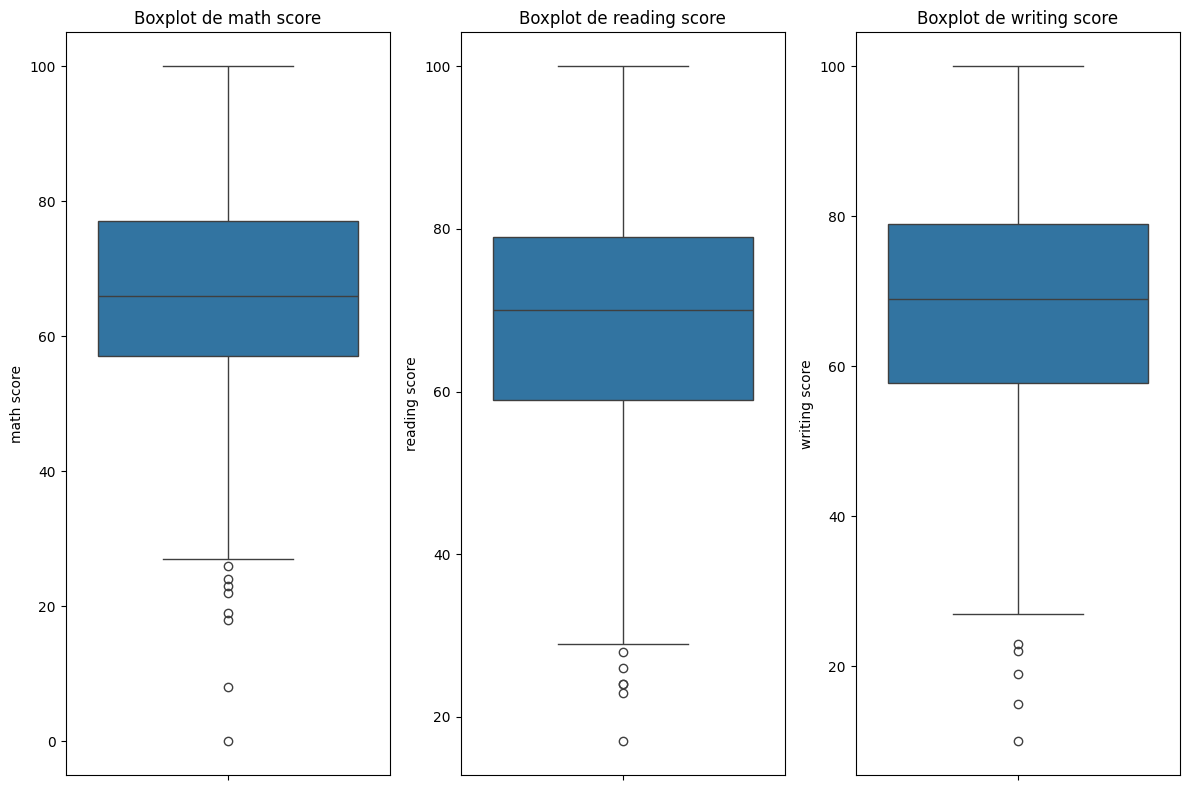

In [ ]:
# Visualización de boxplots para identificar outliers en variables numéricas
num_cols = ['math score', 'reading score', 'writing score']
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

## Análisis univariado / Univariate analysis

Mostramos distribuciones y frecuencias de todas las columnas. <br>
We show distributions and frequencies for all columns.


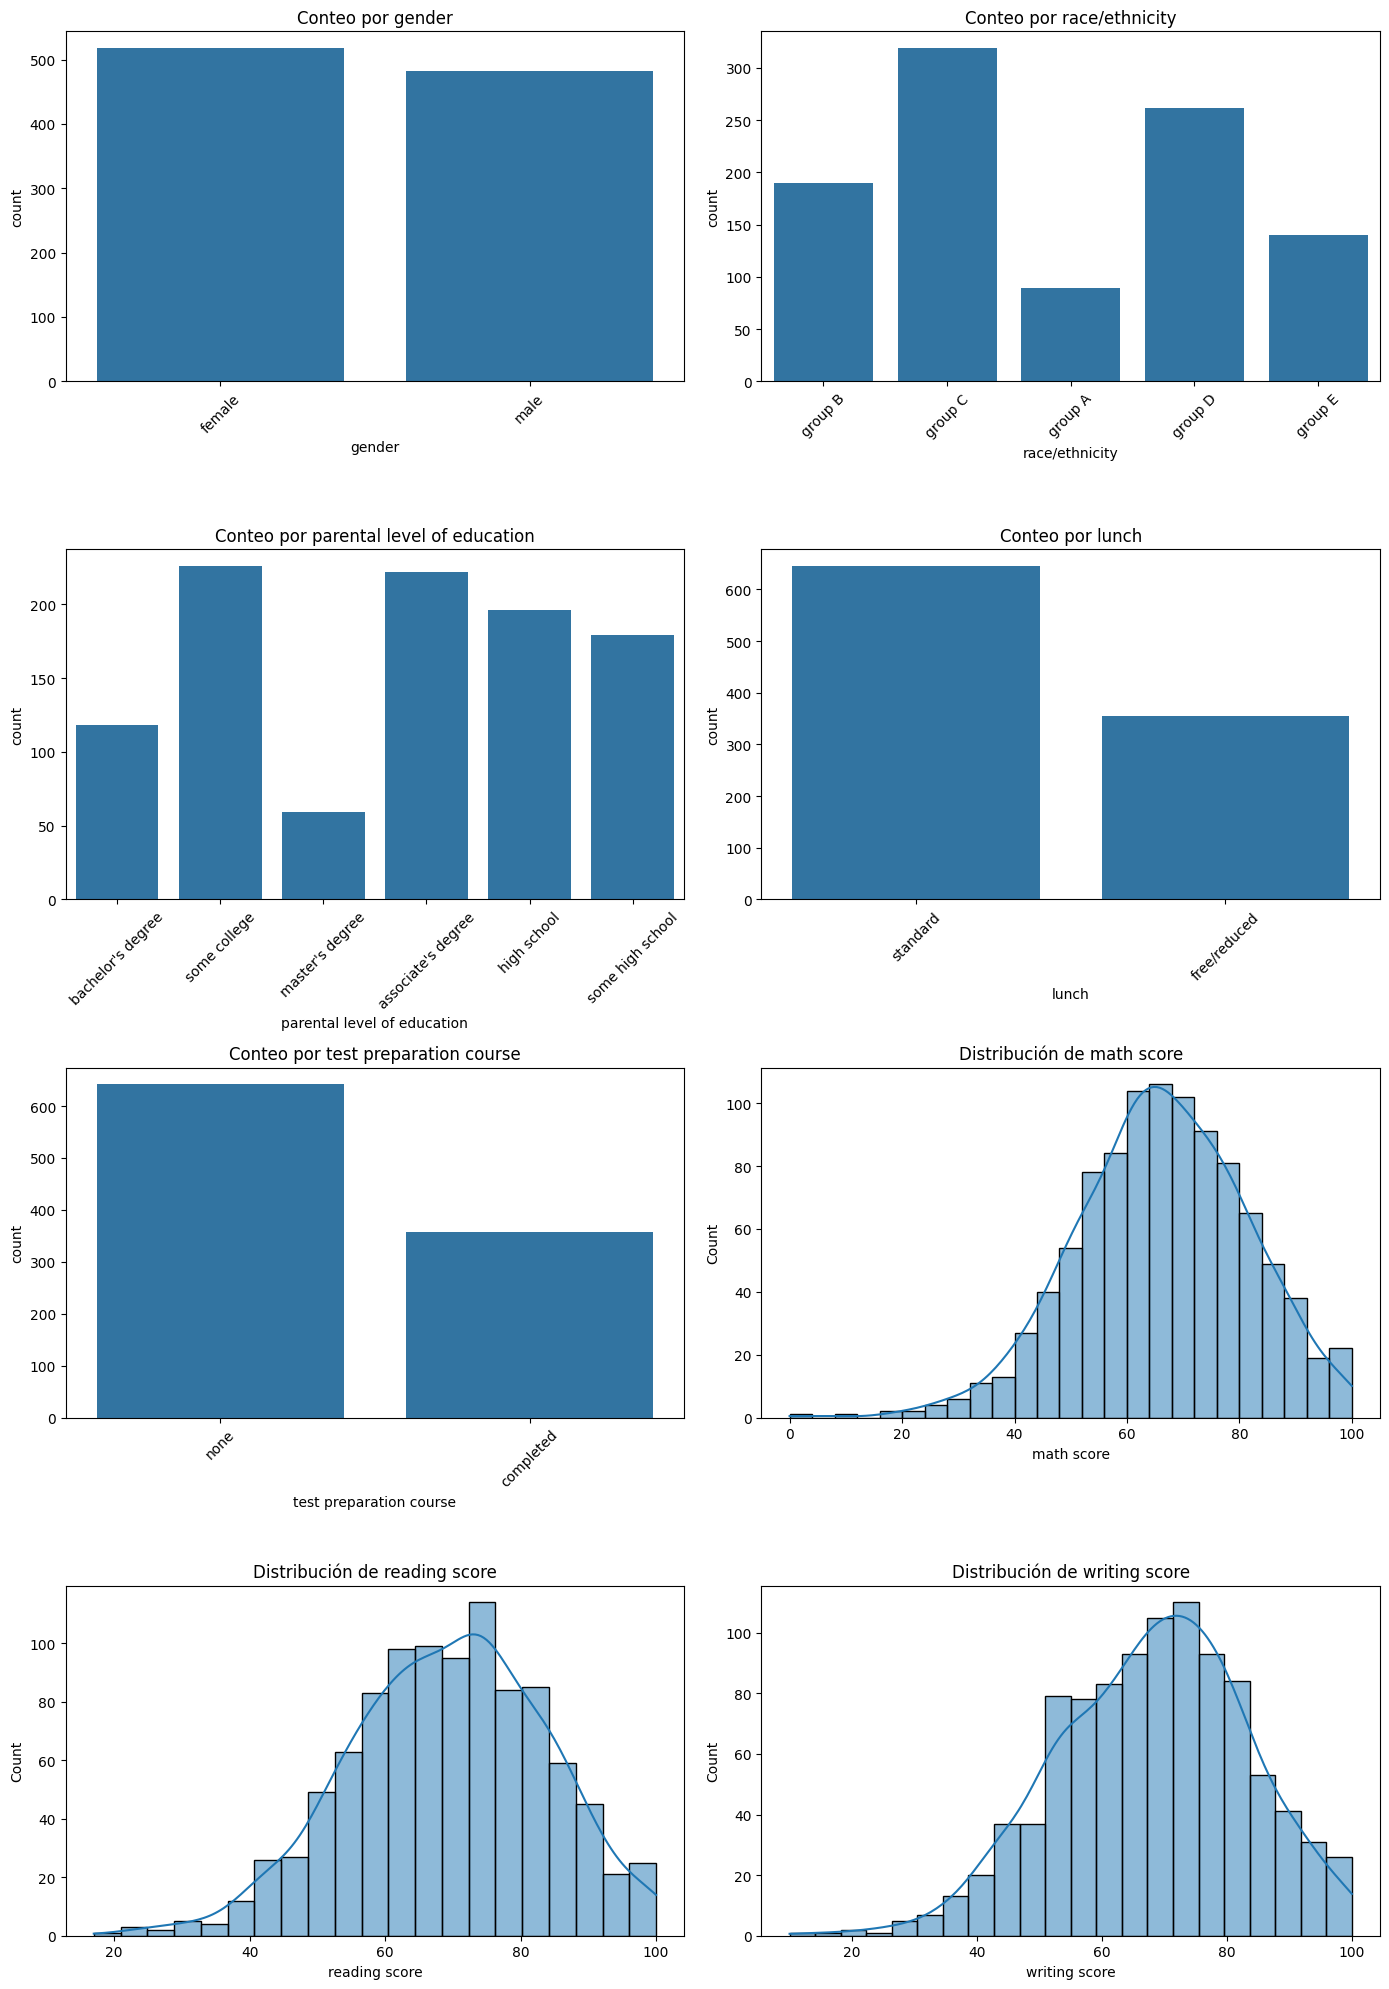

In [ ]:
# Todas las columnas
all_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
            'test preparation course', 'math score', 'reading score', 'writing score']

# Configuración de parámentros de figura
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
axes = axes.flatten()  # convertir a array plano

for i, col in enumerate(all_cols):
    if df[col].dtype == 'object':
        sns.countplot(x=col, data=df, ax=axes[i])
        axes[i].set_title(f'Conteo por {col}')
        axes[i].tick_params(axis='x', rotation=45)
    else:
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribución de {col}')

# Apagar cualquier subplot sobrante (en este caso no hace falta, porque son 8 justos)
#for j in range(len(all_cols), len(axes)):
#    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Análisis bivariado / Bivariate analysis

Exploramos relaciones entre pares de variables y correlaciones. <br>
We explore pairwise relationships and correlations.


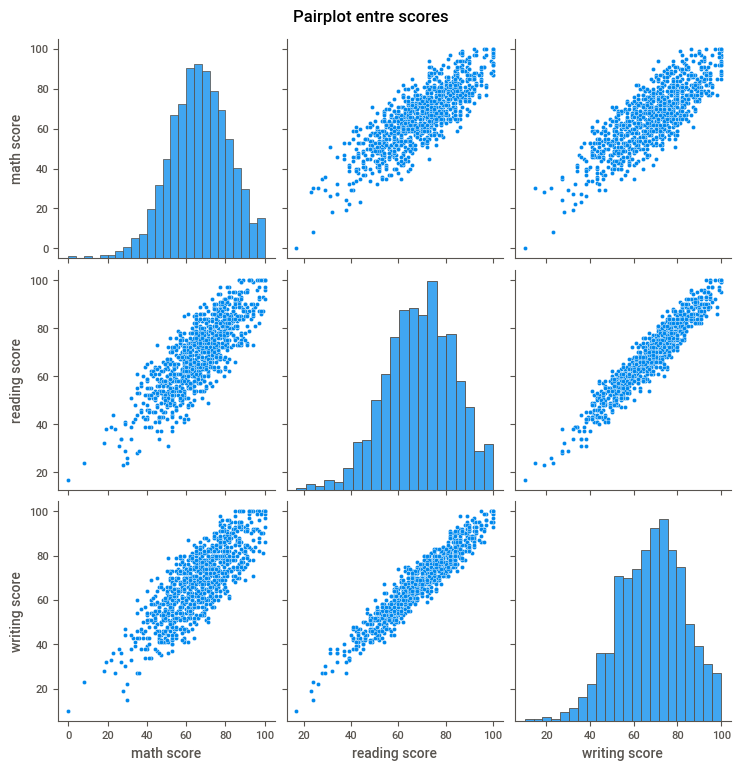

In [ ]:
## Análisis bivariado: relaciones entre variables numéricas
num_cols = ['math score', 'reading score', 'writing score']
# Pairplot para ver relaciones entre pares de variables
sns.pairplot(df[num_cols])
plt.suptitle('Pairplot entre scores', y=1.02)
plt.show()

## Matriz de correlación / Correlation matrix

Visualizamos la matriz de correlación para entender las relaciones entre variables numéricas. <br>
We visualize the correlation matrix to understand relationships between numerical variables.


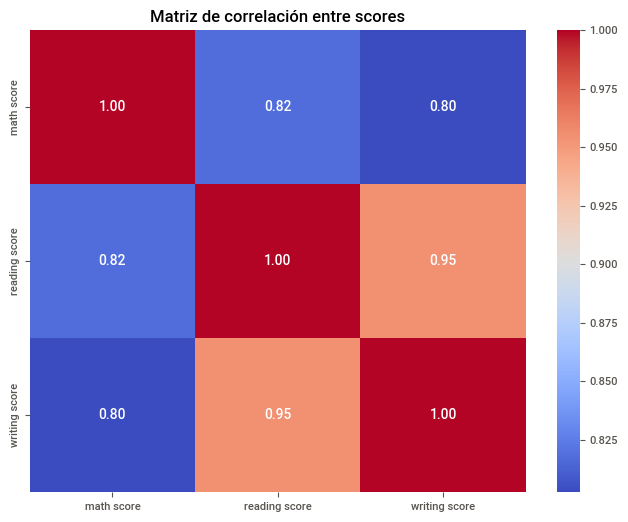

In [ ]:
# Matriz de correlación
corr = df[num_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre scores')
plt.show()


## Codificación one-hot / One-hot encoding

Aplicamos one-hot encoding para convertir variables categóricas en variables binarias.<br>
We apply one-hot encoding to convert categorical variables into binary variables.


In [ ]:
# Codificación de variables categóricas usando one-hot encoding, se presentan en valores de True o False
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,False,False,False,False,True,False,False,True,False,False,True,False
996,62,55,55,True,False,True,False,False,False,True,False,False,False,False,True
997,59,71,65,False,False,True,False,False,False,True,False,False,False,False,False
998,68,78,77,False,False,False,True,False,False,False,False,True,False,True,False


## Codificación y escalado / Encoding and scaling

Codificamos variables categóricas y escalamos variables numéricas. <br>
We encode categorical variables and scale numerical ones.


In [ ]:
# Escalado de variables numéricas con RobustScaler (resistente a outliers)
scaler = RobustScaler()
num_cols = ['math score', 'reading score', 'writing score']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [ ]:
# Presentación de primeras y pultimas filas del dataframe preparado para modelado
df_encoded
#print(df_encoded.head())

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0.30,0.10,0.235294,False,True,False,False,False,True,False,False,False,False,True,True
1,0.15,1.00,0.894118,False,False,True,False,False,False,False,False,True,False,True,False
2,1.20,1.25,1.129412,False,True,False,False,False,False,False,True,False,False,True,True
3,-0.95,-0.65,-1.176471,True,False,False,False,False,False,False,False,False,False,False,True
4,0.50,0.40,0.282353,True,False,True,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.10,1.45,1.223529,False,False,False,False,True,False,False,True,False,False,True,False
996,-0.20,-0.75,-0.658824,True,False,True,False,False,False,True,False,False,False,False,True
997,-0.35,0.05,-0.188235,False,False,True,False,False,False,True,False,False,False,False,False
998,0.10,0.40,0.376471,False,False,False,True,False,False,False,False,True,False,True,False


## Guardado del dataset limpio / Saving the clean dataset

Exportamos el dataset listo para modelado a un archivo CSV. <br>
We export the ready-to-model dataset to a CSV file.


In [ ]:
# Guardado de dataset nuevo un archivo CSV
df_encoded.to_csv('student_performance_cleaned.csv', index=False)

print('EDA completado y dataset preparado para modelado supervisado')

EDA completado y dataset preparado para modelado supervisado


## Resumen final / Final summary

En este notebook realizamos un Análisis Exploratorio de Datos (EDA) completo sobre el dataset de rendimiento estudiantil.  
Exploramos variables numéricas y categóricas, identificamos outliers, analizamos relaciones entre variables y generamos reportes automáticos con herramientas como Sweetviz y Pandas Profiling.  
Además, preparamos los datos para modelado aplicando codificación one-hot y escalado robusto.

El propósito de este proceso es entender profundamente la estructura y las relaciones en los datos, detectar posibles problemas (como valores atípicos o datos faltantes), y dejar el dataset en condiciones óptimas para construir modelos predictivos en etapas posteriores.

Con este dataset limpio y transformado, podemos avanzar hacia tareas de aprendizaje supervisado, como construir modelos de regresión para predecir scores académicos, o clasificar resultados según categorías específicas (por ejemplo, si un estudiante superará cierto umbral).

---

In this notebook, we performed a complete Exploratory Data Analysis (EDA) on the student performance dataset.  
We explored numerical and categorical variables, identified outliers, analyzed relationships between variables, and generated automatic reports using tools like Sweetviz and Pandas Profiling.  
We also prepared the data for modeling by applying one-hot encoding and robust scaling.

The purpose of this process is to gain a deep understanding of the data structure and relationships, detect potential issues (such as outliers or missing data), and leave the dataset in optimal condition for building predictive models in later stages.

With this clean and transformed dataset, we can move on to supervised learning tasks, such as building regression models to predict academic scores or classifying outcomes based on specific categories (e.g., whether a student will surpass a certain threshold).
